C:\Users\Yohanan\AppData\Local\Temp\ipykernel_10976\2599308059.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='GHI', data=all_data, ax=axes[0], palette='Set2')
C:\Users\Yohanan\AppData\Local\Temp\ipykernel_10976\2599308059.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DNI', data=all_data, ax=axes[1], palette='Set2')
C:\Users\Yohanan\AppData\Local\Temp\ipykernel_10976\2599308059.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DHI', data=all_data, ax=axes[2], palette='Set2')


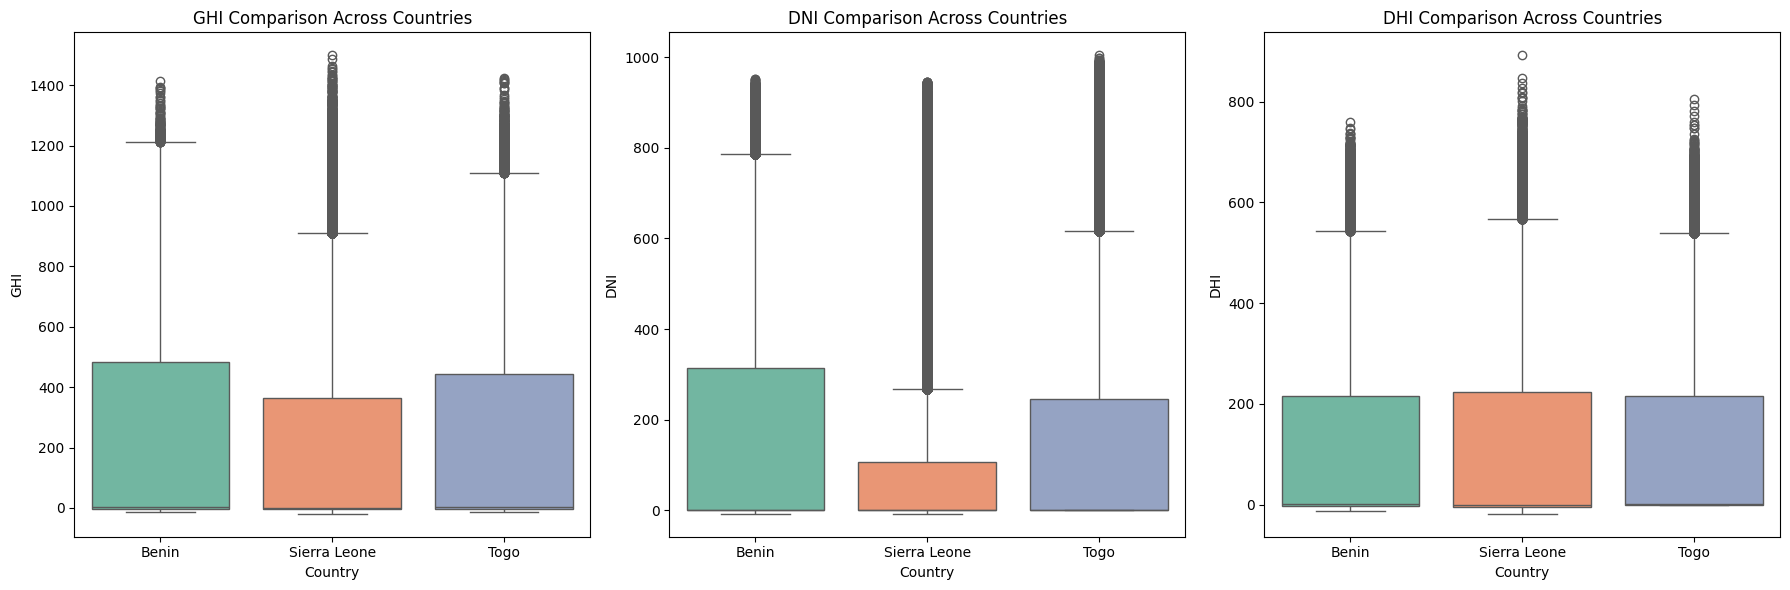

In [14]:
# Load cleaned datasets
import pandas as pd
benin_data = pd.read_csv('benin_clean.csv')
sierraleone_data = pd.read_csv('sierraleone_clean.csv')
togo_data = pd.read_csv('togo_clean.csv')
# Display the first few rows of each dataset to understand their structure
benin_data.head(), sierraleone_data.head(), togo_data.head()
import matplotlib.pyplot as plt
import seaborn as sns

# Combine data from all countries into one DataFrame for easier plotting
benin_data['Country'] = 'Benin'
sierraleone_data['Country'] = 'Sierra Leone'
togo_data['Country'] = 'Togo'

# Concatenate all the dataframes
all_data = pd.concat([benin_data[['GHI', 'DNI', 'DHI', 'Country']],
                      sierraleone_data[['GHI', 'DNI', 'DHI', 'Country']],
                      togo_data[['GHI', 'DNI', 'DHI', 'Country']]])

# Set up the figure size and plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot for GHI
sns.boxplot(x='Country', y='GHI', data=all_data, ax=axes[0], palette='Set2')
axes[0].set_title('GHI Comparison Across Countries')

# Boxplot for DNI
sns.boxplot(x='Country', y='DNI', data=all_data, ax=axes[1], palette='Set2')
axes[1].set_title('DNI Comparison Across Countries')

# Boxplot for DHI
sns.boxplot(x='Country', y='DHI', data=all_data, ax=axes[2], palette='Set2')
axes[2].set_title('DHI Comparison Across Countries')

plt.tight_layout()
plt.show()


In [15]:
# Summary statistics
summary_stats = all_data.groupby('Country').agg(
    GHI_mean=('GHI', 'mean'),
    GHI_median=('GHI', 'median'),
    GHI_std=('GHI', 'std'),
    DNI_mean=('DNI', 'mean'),
    DNI_median=('DNI', 'median'),
    DNI_std=('DNI', 'std'),
    DHI_mean=('DHI', 'mean'),
    DHI_median=('DHI', 'median'),
    DHI_std=('DHI', 'std')
)

summary_stats
summary_stats.to_csv('summary_statistics.csv')


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


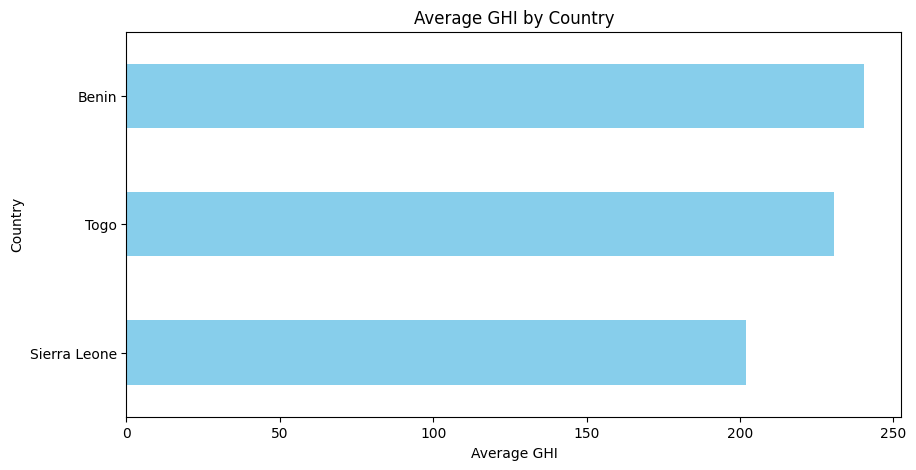

In [18]:
#%pip install scipy

from scipy.stats import f_oneway, kruskal

# Extract GHI data for each country
benin_ghi = benin_data['GHI']
sierraleone_ghi = sierraleone_data['GHI']
togo_ghi = togo_data['GHI']

# One-way ANOVA (parametric test)
anova_result = f_oneway(benin_ghi, sierraleone_ghi, togo_ghi)

# Display p-values
anova_result.pvalue 
# Bonus
# Calculate the mean GHI for each country
avg_ghi = all_data.groupby('Country')['GHI'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 5))
avg_ghi.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average GHI by Country')
plt.xlabel('Average GHI')
plt.ylabel('Country')
plt.show()

